## Exercise 3.1
Below you find the plots and the correlograms of four datasets. The correlograms have been permutated. Please find for each data sets (A-D) the appropriate corellogram.

In [1]:
library(fma)

Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



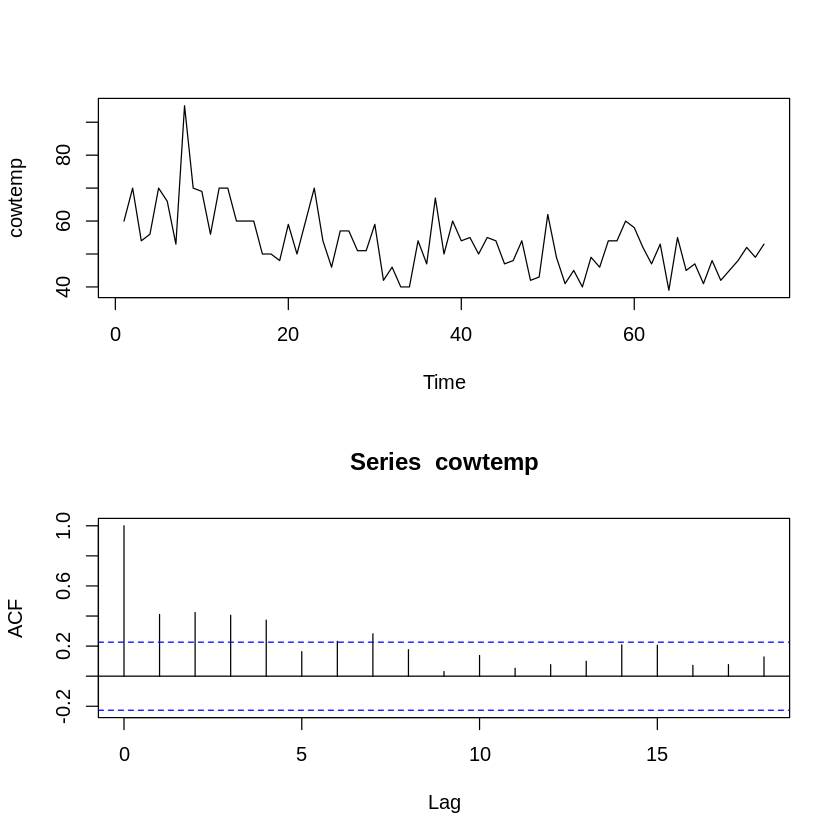

In [2]:
par(mfrow = c(2, 1))

plot(cowtemp)
acf(cowtemp)

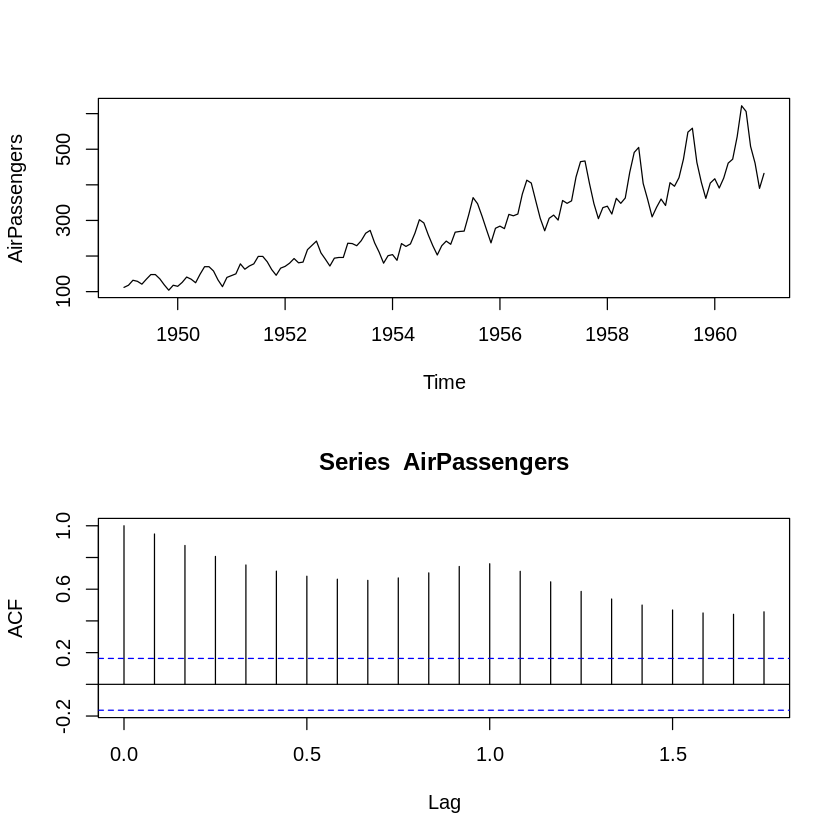

In [3]:
par(mfrow = c(2, 1))

plot(AirPassengers)
acf(AirPassengers)

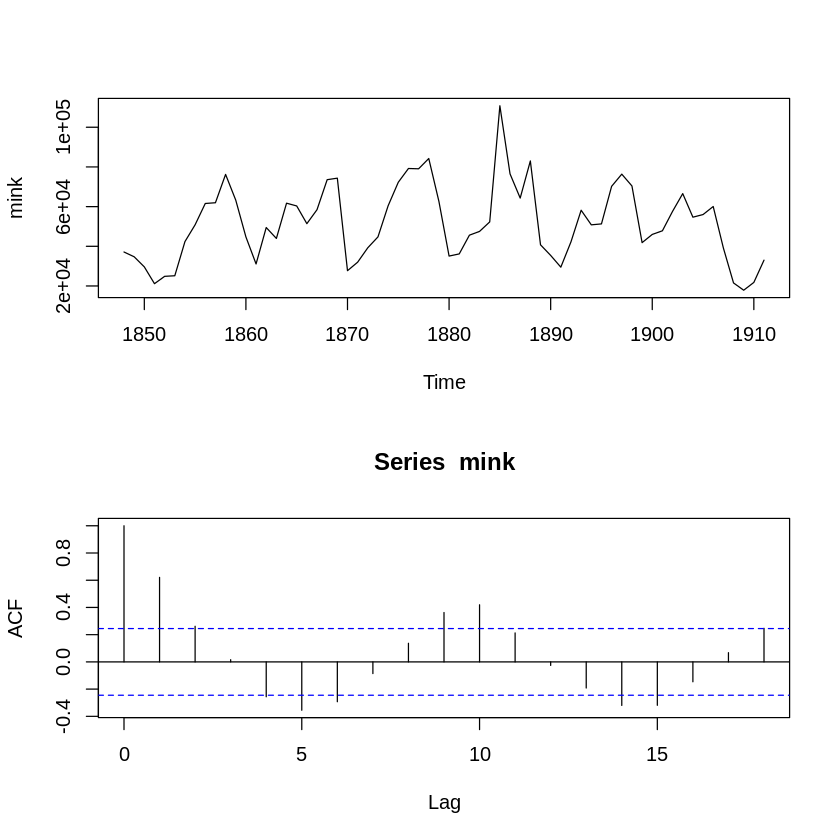

In [4]:
par(mfrow = c(2, 1))

plot(mink)
acf(mink)

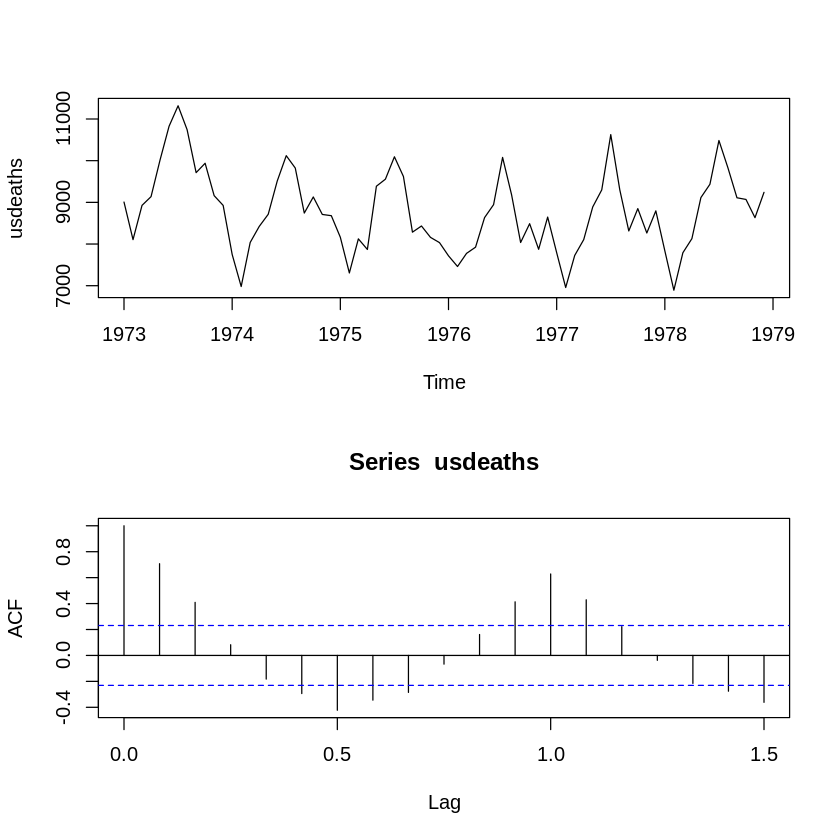

In [5]:
par(mfrow = c(2, 1))

plot(usdeaths)
acf(usdeaths)

**Solution**: A2, B3, C1, D4

## Exercise 3.2
Let us now consider the electricity production of Australia in GWh in the period from January 1958 to December 1990. You may download the data from https://raw.githubusercontent.com/dallascard/Introductory_Time_Series_with_R_datasets/master/cbe.dat.

The aim of this exercise is to compare the effect of different algorithms to decompose a time series representation in trend, seasonality and remainder by means of their (partial) autocorrelation function.

In [6]:
library(readr)
cbe.d <- read_tsv('https://raw.githubusercontent.com/dallascard/Introductory_Time_Series_with_R_datasets/master/cbe.dat')


── Column specification ────────────────────────────────────────────────────────
cols(
  choc = col_double(),
  beer = col_double(),
  elec = col_double()
)




a) Start by considering the plot of the time series. Why is not meaningful to interpret the correlogram of this time series?
Explain in a few sentences.

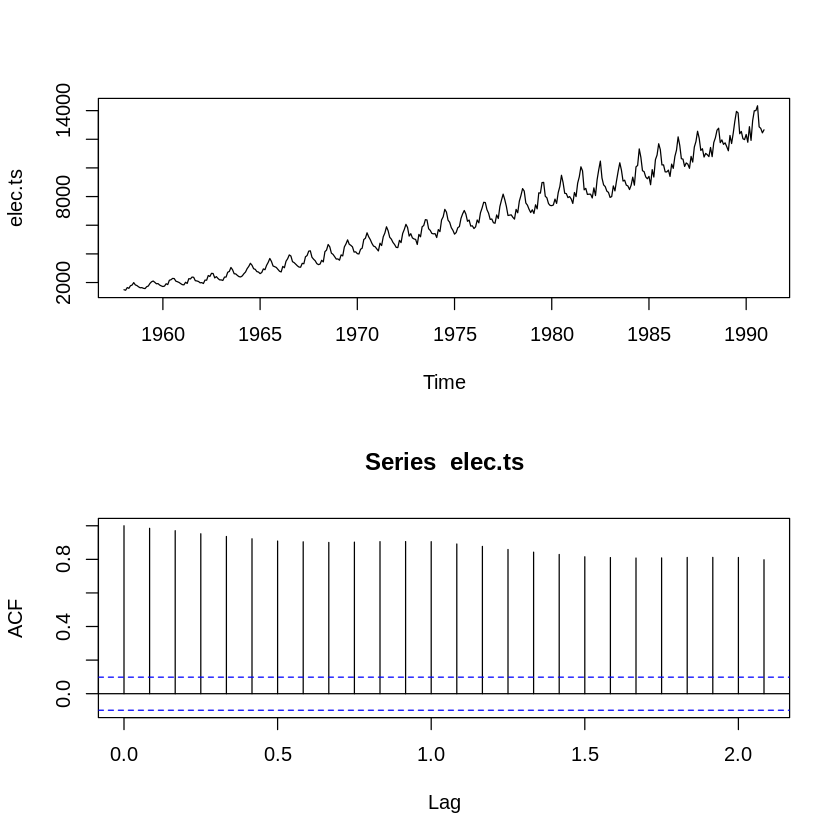

In [7]:
par(mfrow = c(2, 1))
elec.ts <- ts(cbe.d$elec, start=c(1958,1),frequency=12)
plot(elec.ts)
acf(elec.ts)

**Interpretation**: It is not meaningful to interpret the correlogram, because already in the plot, we can se a strong seasonality and trend. Also, the time-searies appears to be logarithmic in nature. Therefore, the ACF shows only a very slow decay and a slight oscillatory behaviour.

b) Decompose the time series into trend, seasonal component and remainder using the R function decompose(), which performs the decomposition with moving averages. Plot the remainder and its correlogram and interpret the plots in a few sentences.

List of 6
 $ x       : Time-Series [1:396] from 1958 to 1991: 1497 1463 1648 1595 1777 ...
 $ seasonal: Time-Series [1:396] from 1958 to 1991: 0.909 0.891 0.97 0.938 1.051 ...
 $ trend   : Time-Series [1:396] from 1958 to 1991: NA NA NA NA NA ...
 $ random  : Time-Series [1:396] from 1958 to 1991: NA NA NA NA NA ...
 $ figure  : num [1:12] 0.909 0.891 0.97 0.938 1.051 ...
 $ type    : chr "multiplicative"
 - attr(*, "class")= chr "decomposed.ts"


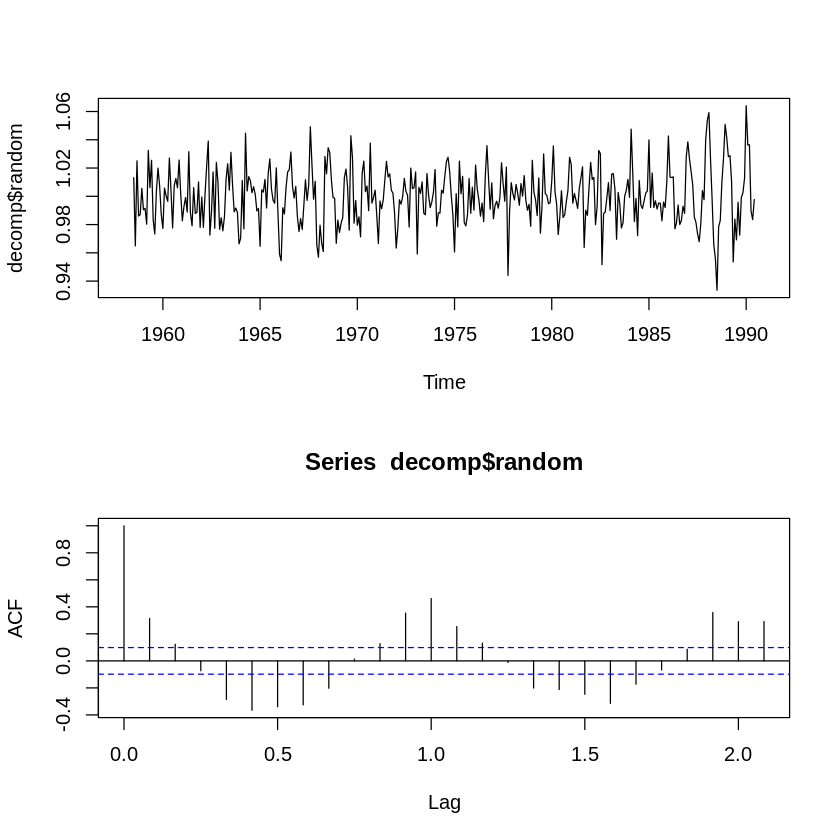

In [8]:
par(mfrow = c(2, 1))

decomp <- decompose(elec.ts, type = "multiplicative")
str(decomp)

plot(decomp$random)
acf(decomp$random, na.action = na.pass, plot = TRUE)

**Interpretation**: The ACR dsiplays a periodic structure. It appears there is still some seasonality in the remainder from the decomposition.

c) Decompose the log-transformed time series using the R function stl(). Estimate the seasonal effect once by averaging over all years (parameter s.window = "periodic") and once by choosing an appropriate smoothing window (parameter s.window = ...). Recall that the window length has to be odd. An appropriate smoothing window may be determined by the R-function monthplot().
For both estimation approaches (averaging and smoothing window), plot the remainder and its correlogram, and comment on the plots.

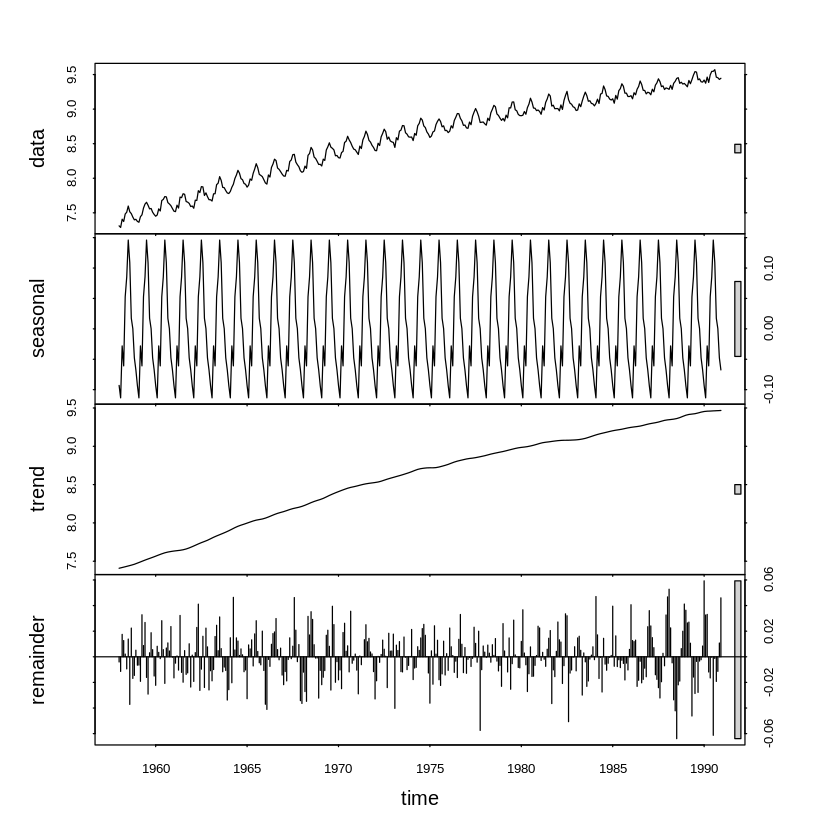

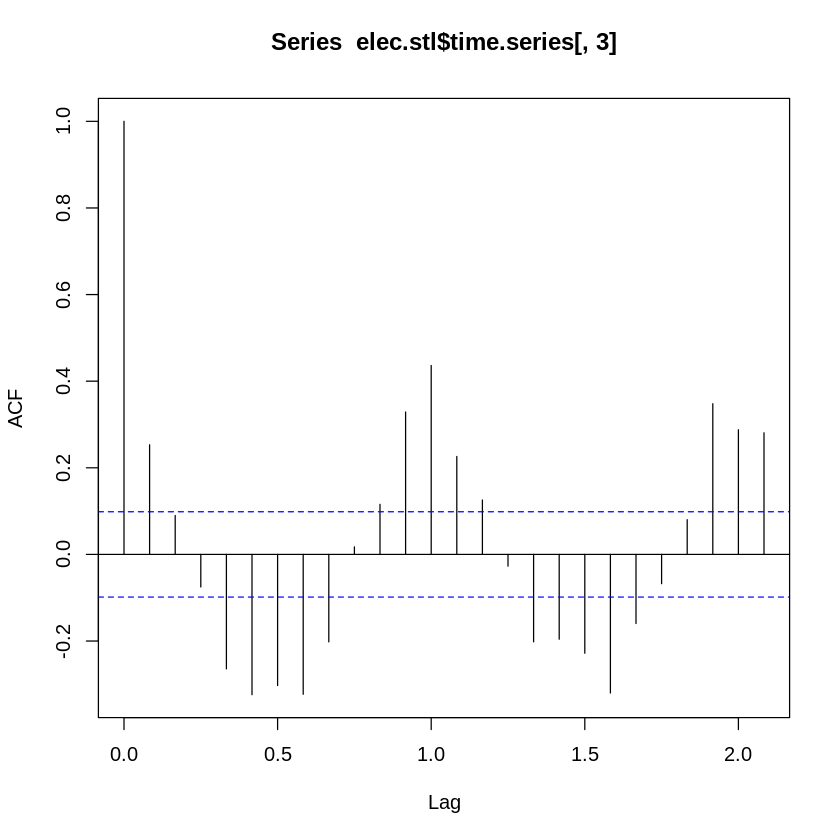

In [9]:
elec.stl <- stl(log(elec.ts), s.window = "periodic")
plot(elec.stl)
acf(elec.stl$time.series[,3])

**Interpratiation**: The remainder contains seasonality, due to the ACF showing a periodic structure. The trend was extracted by the stl function.

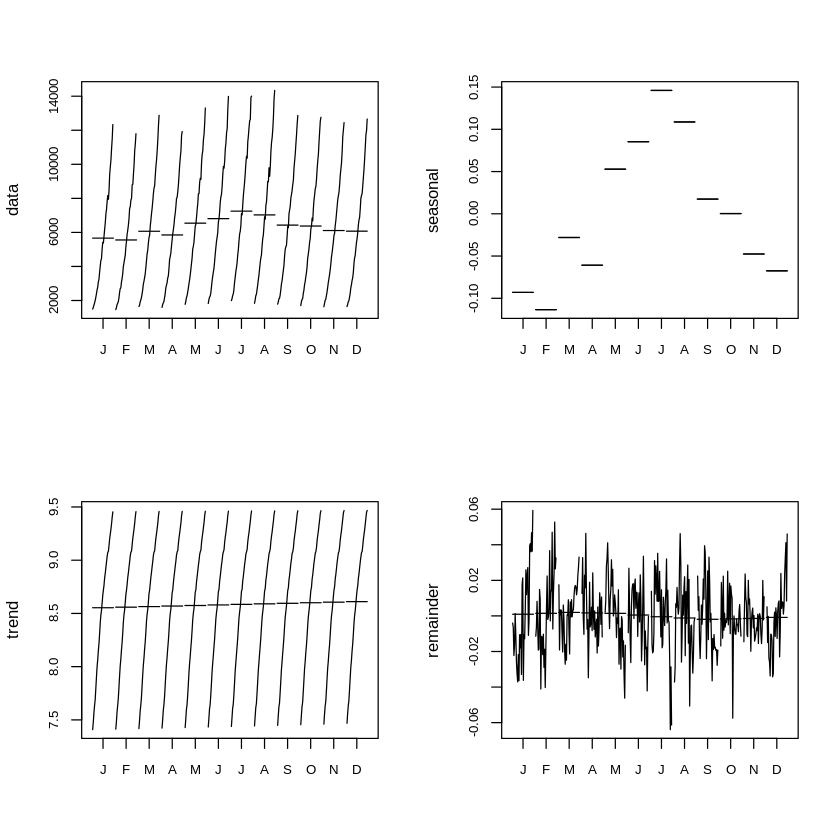

In [10]:
par(mfrow=c(2,2))

monthplot(elec.ts, ylab = "data", cex.axis = 0.8)
monthplot(elec.stl, choice="seasonal", cex.axis = 0.8)
monthplot(elec.stl, choice="trend", cex.axis = 0.8)
monthplot(elec.stl, choice="remainder", cex.axis = 0.8)

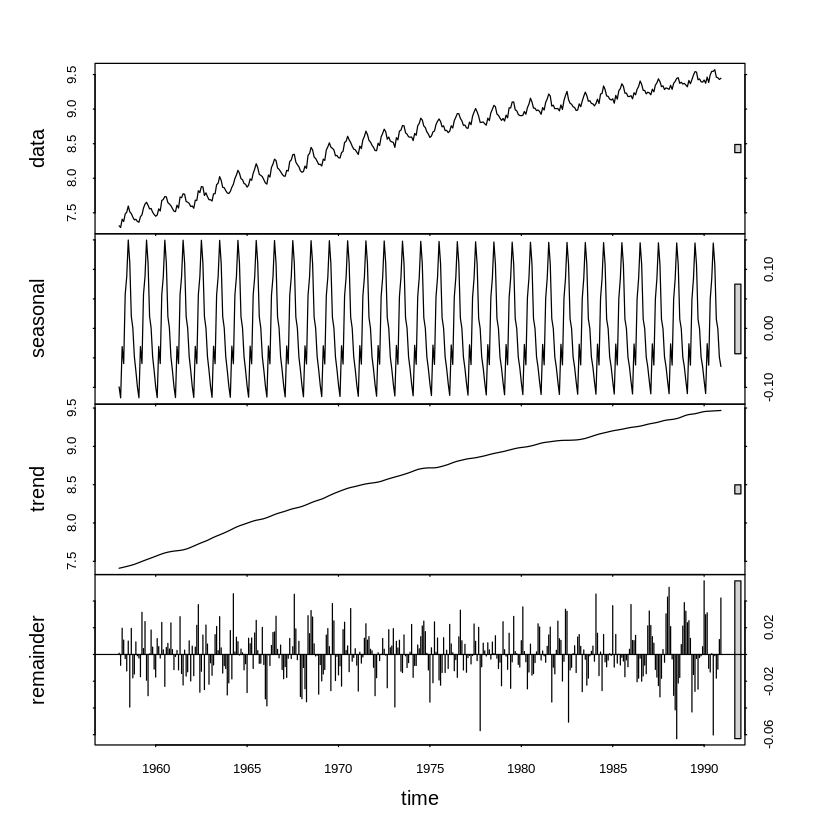

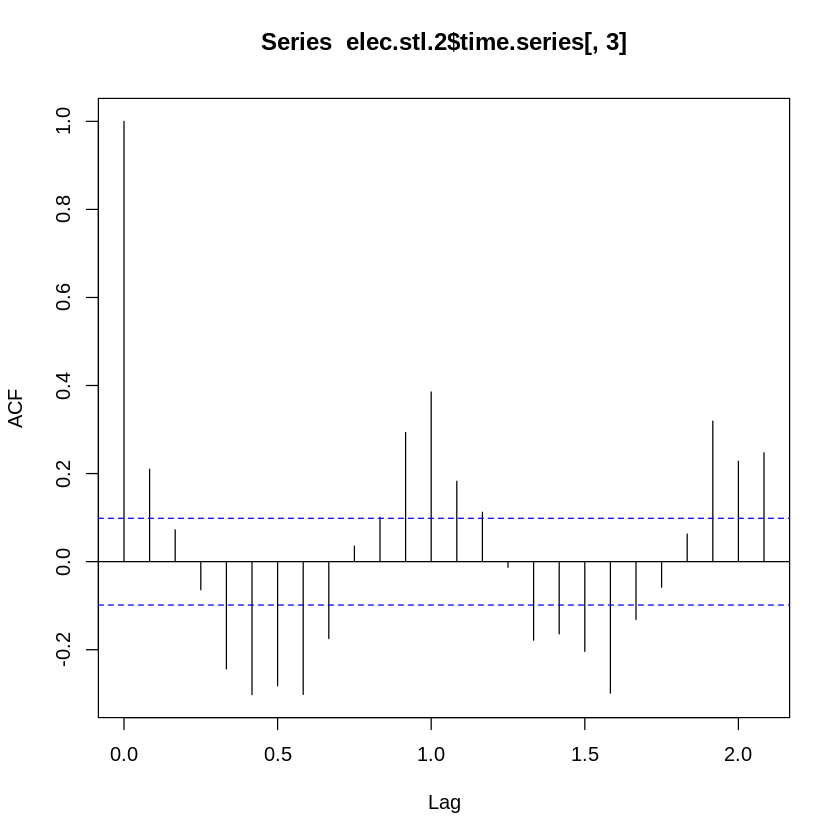

In [11]:
elec.stl.2 <- stl(log(elec.ts), s.window = 61)
plot(elec.stl.2)
acf(elec.stl.2$time.series[,3])

**Interpratiation**: With a lag of 61 months (5 years + 1 month), the ACF output is similar to the one we achieved with s.window = 'periodic', which let's me assume that after around 5 years we can see a seasonality in the data. However, it is not clear to me how the monthplot() should have helped in this situation. 

d) Explain why you used the parameter type = "multiplicative" in Task b), and why you log-transformed the time series before performing an stl() decomposition in Task c).

The parameter type = "multiplicative" and the log-transformation were used, because the trend we can observe from plotting the data is not linear. It appears to be an exponential function, that's why we used a log-transformation and the multiplicative type.

e) As a last algorithm consider the differencing approach. Choose a lag of 1 and 12 (months) to eliminate a trend and periodic structures. Plot the resulting time series and autocorrelation function. Compare the results to the previous methods.

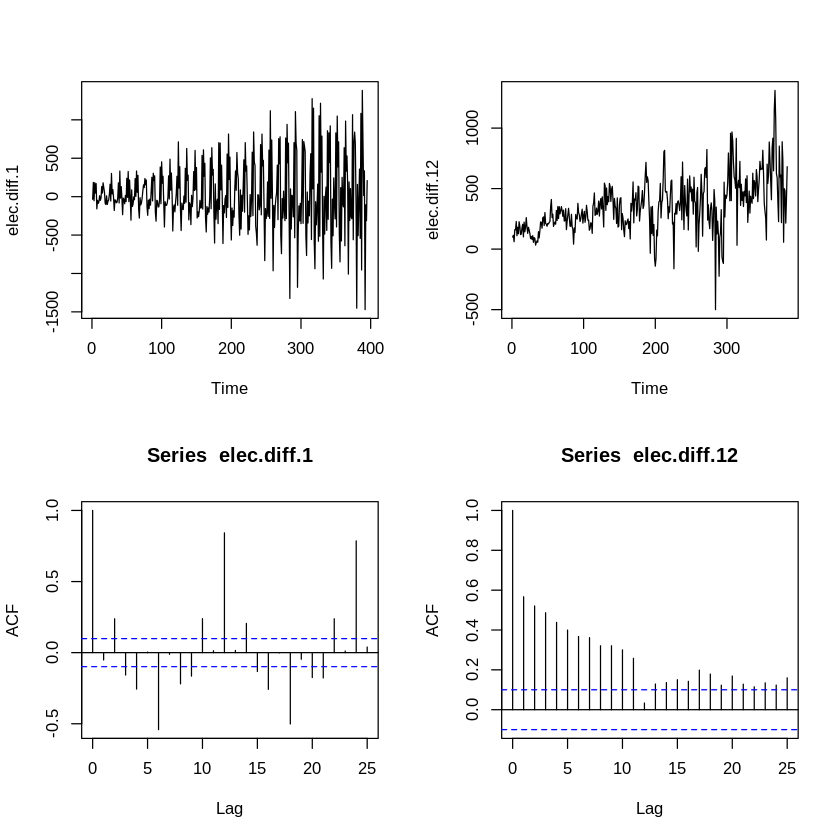

In [12]:
par(mfrow=c(2,2))

elec.diff.1 <- ts(diff(elec.ts, lag = 1, differences = 1))
elec.diff.12 <- ts(diff(elec.ts, lag = 12, differences = 1))

plot(elec.diff.1)
plot(elec.diff.12)
acf(elec.diff.1)
acf(elec.diff.12)

**Interpretation**: With a lag of 1, the trend is eliminated but the seasonality is still contained. The ACF indicates that as well, as we can see an oscillatory behavior but no decay.
Whereas with a lag of 12, the trend is still contained. The ACF shows a rather fast decay, which results from the trend. However, after a lag of 11, there seems to be a change in the time series behavior. The decay is interupted and a periodic structure appears.